# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 61.33 -7.603 6.917 138.6 ... 442.7 406.0 457.9

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

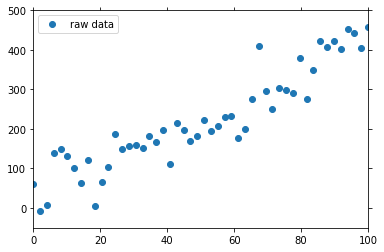

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

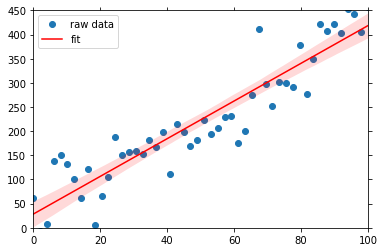

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[2.84468219e+01, 3.23881507e+01, 3.63294794e+01, 4.02708081e+01,
        4.42121369e+01, 4.81534656e+01, 5.20947943e+01, 5.60361231e+01,
        5.99774518e+01, 6.39187805e+01, 6.78601093e+01, 7.18014380e+01,
        7.57427667e+01, 7.96840955e+01, 8.36254242e+01, 8.75667529e+01,
        9.15080817e+01, 9.54494104e+01, 9.93907391e+01, 1.03332068e+02,
        1.07273397e+02, 1.11214725e+02, 1.15156054e+02, 1.19097383e+02,
        1.23038712e+02, 1.26980040e+02, 1.30921369e+02, 1.34862698e+02,
        1.38804026e+02, 1.42745355e+02, 1.46686684e+02, 1.50628013e+02,
        1.54569341e+02, 1.58510670e+02, 1.62451999e+02, 1.66393328e+02,
        1.70334656e+02, 1.74275985e+02, 1.78217314e+02, 1.82158643e+02,
        1.86099971e+02, 1.90041300e+02, 1.93982629e+02, 1.97923957e+02,
        2.01865286e+02, 2.05806615e+02, 2.09747944e+02, 2.13689272e+02,
        2.17630601e+02, 2.21571930e+02, 2.25513259e+02, 2.29454587e+02,
        2.33395916e+02, 2.37337245e+02, 2.41278574e+02, 2.45219902e+02,
        2.49161231e+02, 2.53102560e+02, 2.57043889e+02, 2.60985217e+02,
        2.64926546e+02, 2.68867875e+02, 2.72809203e+02, 2.76750532e+02,
        2.80691861e+02, 2.84633190e+02, 2.88574518e+02, 2.92515847e+02,
        2.96457176e+02, 3.00398505e+02, 3.04339833e+02, 3.08281162e+02,
        3.12222491e+02, 3.16163820e+02, 3.20105148e+02, 3.24046477e+02,
        3.27987806e+02, 3.31929134e+02, 3.35870463e+02, 3.39811792e+02,
...
        1.25324912e+02, 1.28903319e+02, 1.32668913e+02, 1.36404229e+02,
        1.39988881e+02, 1.43645655e+02, 1.47293475e+02, 1.50808874e+02,
        1.54553191e+02, 1.58425617e+02, 1.62189376e+02, 1.65790721e+02,
        1.69615244e+02, 1.73351043e+02, 1.77072920e+02, 1.80835091e+02,
        1.84798150e+02, 1.88753512e+02, 1.92464612e+02, 1.96255140e+02,
        2.00196228e+02, 2.04303311e+02, 2.08195595e+02, 2.11918082e+02,
        2.15556040e+02, 2.19369405e+02, 2.23100396e+02, 2.26814236e+02,
        2.30575589e+02, 2.34316916e+02, 2.38065564e+02, 2.41759006e+02,
        2.45630446e+02, 2.49801704e+02, 2.53749253e+02, 2.57799191e+02,
        2.61946752e+02, 2.66134904e+02, 2.70318870e+02, 2.74404279e+02,
        2.78297886e+02, 2.82153962e+02, 2.86196926e+02, 2.90150172e+02,
        2.94102695e+02, 2.98053418e+02, 3.02004141e+02, 3.05954864e+02,
        3.10265777e+02, 3.14645738e+02, 3.18939866e+02, 3.23194135e+02,
        3.27389216e+02, 3.31671252e+02, 3.35827378e+02, 3.40135908e+02,
        3.44478408e+02, 3.48838601e+02, 3.53061501e+02, 3.57368418e+02,
        3.61676792e+02, 3.65986328e+02, 3.70295623e+02, 3.74687628e+02,
        3.78996209e+02, 3.83253531e+02, 3.87529746e+02, 3.91836240e+02,
        3.96024396e+02, 4.00453434e+02, 4.04843322e+02, 4.09072400e+02,
        4.13380930e+02, 4.17689461e+02, 4.21996439e+02, 4.26137269e+02,
        4.30539943e+02, 4.34745627e+02, 4.39089335e+02, 4.43420969e+02]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      3.9019154467129207
    intercept:  28.446821926887775
    rsquared:   0.8571328207787087

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

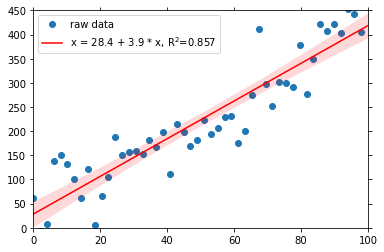

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

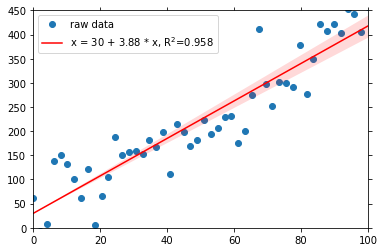

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

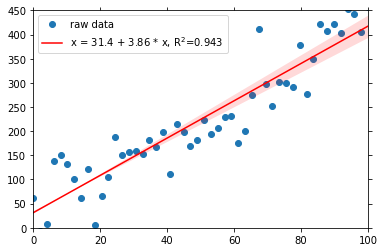

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')